
# UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #visualization

Loading Data

In [2]:
!pip install kaggle

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [4]:
# Downloading Datasets:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [5]:
# See the content:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [6]:
# Extract the data:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


Exploring data

In [ ]:
# Reading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission_example.csv')
submission.shape

(296786, 2)

In [ ]:
train.shape

(692500, 21)

In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
test.tail()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260
296785,792650,20212,INGENIERIA INDUSTRIAL,BOYACA,No pagó matrícula,0,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) completa,0.305,0.245,0.277,0.270


In [ ]:
submission.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,medio-bajo
2,499179,medio-alto
3,782980,alto
4,785185,medio-bajo


In [ ]:
submission.RENDIMIENTO_GLOBAL.unique()

array(['medio-bajo', 'medio-alto', 'alto', 'bajo'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [ ]:
for i in train.columns:
  print ("%30s"%i, np.sum(train[i].isna()))

                            ID 0
                       PERIODO 0
           ESTU_PRGM_ACADEMICO 0
        ESTU_PRGM_DEPARTAMENTO 0
ESTU_VALORMATRICULAUNIVERSIDAD 6287
       ESTU_HORASSEMANATRABAJA 30857
          FAMI_ESTRATOVIVIENDA 32137
            FAMI_TIENEINTERNET 26629
           FAMI_EDUCACIONPADRE 23178
            FAMI_TIENELAVADORA 39773
           FAMI_TIENEAUTOMOVIL 43623
         ESTU_PRIVADO_LIBERTAD 0
      ESTU_PAGOMATRICULAPROPIO 6498
          FAMI_TIENECOMPUTADOR 38103
          FAMI_TIENEINTERNET.1 26629
           FAMI_EDUCACIONMADRE 23664
            RENDIMIENTO_GLOBAL 0
                        coef_1 0
                        coef_2 0
                        coef_3 0
                        coef_4 0


In [ ]:
train.RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


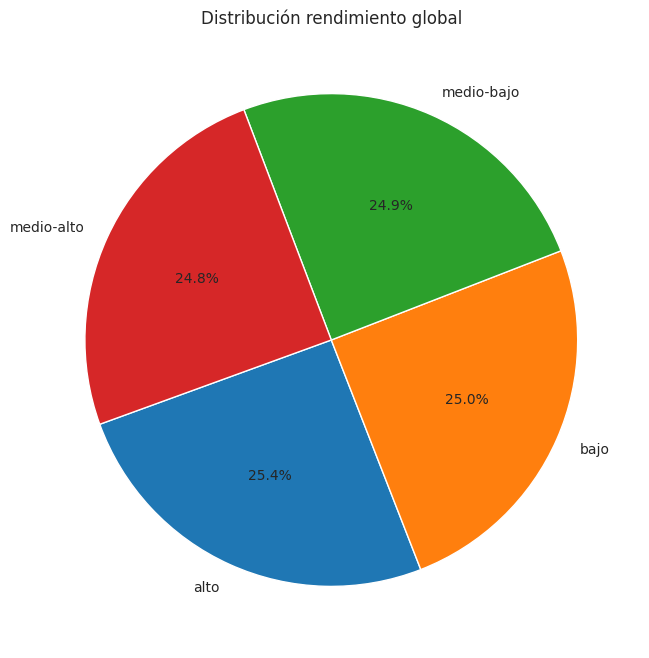

In [ ]:
# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    train.RENDIMIENTO_GLOBAL.value_counts(),
    labels=train.RENDIMIENTO_GLOBAL.value_counts().index,
    autopct='%1.1f%%',
    startangle=200
)
plt.title('Distribución rendimiento global')
plt.show()

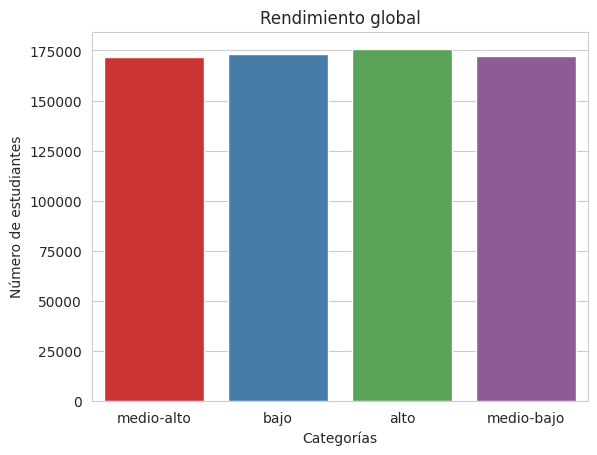

In [ ]:
sns.set_style('whitegrid')  # setting style of charts
sns.countplot(
    x='RENDIMIENTO_GLOBAL',
    hue="RENDIMIENTO_GLOBAL",
    data=train,
    palette='Set1'
).set(title='Rendimiento global')
plt.xlabel('Categorías')
plt.ylabel('Número de estudiantes')
plt.show()

In [ ]:
train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index

Index(['Entre 1 millón y menos de 2.5 millones',
       'Entre 2.5 millones y menos de 4 millones', 'Menos de 500 mil',
       'Entre 500 mil y menos de 1 millón',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 5.5 millones y menos de 7 millones', 'No pagó matrícula'],
      dtype='object', name='ESTU_VALORMATRICULAUNIVERSIDAD')

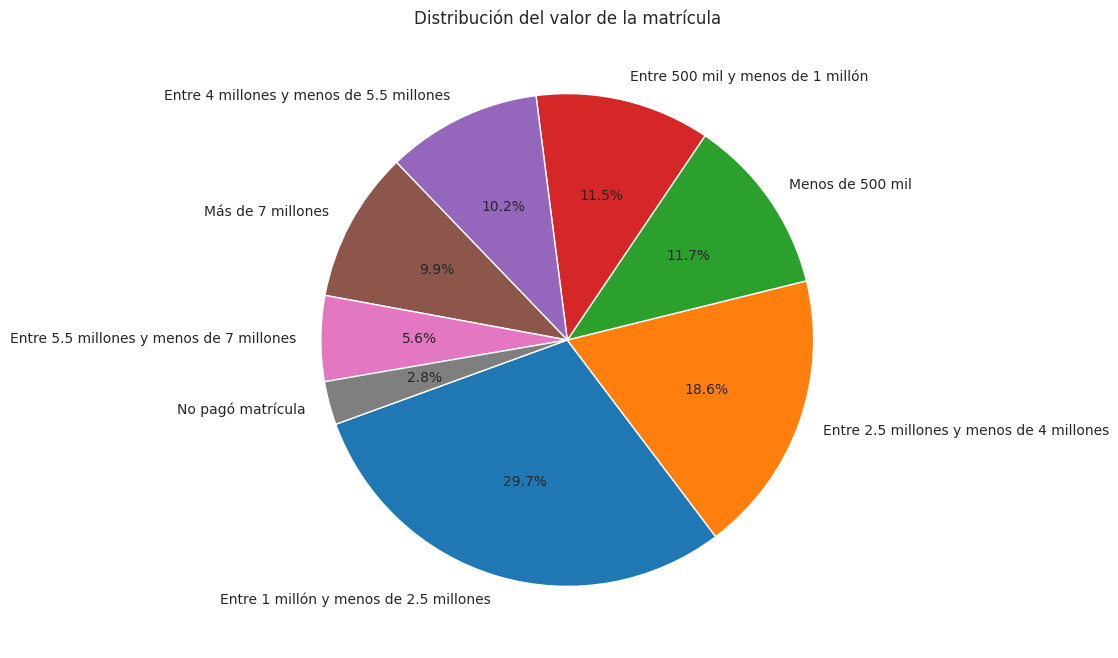

In [ ]:
# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts(),
    labels=train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index,
    autopct='%1.1f%%',
    startangle=200
)
plt.title('Distribución del valor de la matrícula')
plt.show()

In [ ]:
train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528
